In [1]:
import scanpy as sc
import scvelo as scv
#import cellrank as cr
import numpy as np
import pandas as pd
#import anndata as ad

In [2]:
adata = adata = sc.read_h5ad("/omics/groups/OE0533/internal/katharina/scDoRI/gastrulation_data/anndata_rna.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 36822 × 32245
    obs: 'sample', 'barcode', 'stage', 'nFeature_RNA', 'nCount_RNA', 'mitochondrial_percent_RNA', 'ribosomal_percent_RNA', 'pass_rnaQC', 'celltype.mapped', 'celltype.score', 'closest.cell', 'hybrid_score', 'doublet_call', 'TSSEnrichment_atac', 'ReadsInTSS_atac', 'PromoterRatio_atac', 'NucleosomeRatio_atac', 'nFrags_atac', 'BlacklistRatio_atac', 'pass_atacQC', 'celltype.predicted', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'gene', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'celltype.mapped_colors', 'stage_colors'
    layers: 'spliced', 'unspliced'

In [4]:
help(scv.pp.moments)

Help on function moments in module scvelo.preprocessing.moments:

moments(data, n_neighbors=30, n_pcs=None, mode='connectivities', method='umap', use_rep=None, use_highly_variable=True, copy=False)
    Computes moments for velocity estimation.
    
    First-/second-order moments are computed for each cell across its nearest neighbors,
    where the neighbor graph is obtained from euclidean distances in PCA space.
    
    Arguments
    ---------
    data: :class:`~anndata.AnnData`
        Annotated data matrix.
    n_neighbors: `int` (default: 30)
        Number of neighbors to use.
    n_pcs: `int` (default: None)
        Number of principal components to use.
        If not specified, the full space is used of a pre-computed PCA,
        or 30 components are used when PCA is computed internally.
    mode: `'connectivities'` or `'distances'`  (default: `'connectivities'`)
        Distance metric to use for moment computation.
    method : {{'umap', 'hnsw', 'sklearn', `None`}}  (defau

In [5]:
scv.pp.filter_and_normalize(adata)
# computes PCA and neighbors
scv.pp.moments(adata)

Normalized count data: X, spliced, unspliced.
computing neighbors
    finished (0:01:50) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:01:58) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


Lets have a look at the proportions of spliced and unspliced RNA.

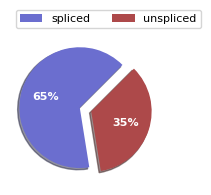

In [6]:
scv.pl.proportions(adata)


For each gene a steady state ratio of spliced and unspliced mRNA counts is fitted. Velocities are obtained as residuals from this ratio. The computed velocities are stored in `adata.layers`. Velocities are vectors in gene expression space.

In [ ]:
scv.tl.velocity(adata, mode='stochastic')

computing velocities


The combination of velocities across genes can be used to determine future states of an individual cell. To project the velocities into a lower dimensional space we compute cell-to-cell transition probabilities. For each velocity vectors the cell transtitions which fit to the direction are found. A transition probability is computed with cosine correlation between cell-to-cell transitions and velocity vectors. These cosine correlations are stored as a matrix = velocity graph $n_{obs} x n_{obs}$. The velocity graph summarizes the possible cell state changes and that are well explained through the velocity vectors. 

In [ ]:
# project the velocities into lower dimensional space
scv.pl.velocity_embedding_stream(adata, basis='umap')
